In [1]:
from msibi import MSIBI, State, Pair, Bond, Angle, mie
import gsd
import gsd.hoomd

## Step 1:
use cmeutils.polymers for:

1. Create CG mapping representation of the atomistic trajectory
2. Get bond length and angle distributions for each atomistic trajectory
    - The most probably bond length and angle will be used as the equilibrium distances
3. Write a .gsd file of the CG representation of the atomistic trajectory
    - This new .gsd file will be used by MSIBI to find the target pair RDFs

In [2]:
%%bash
if [ -d "states" ]
then
    rm -r states
fi

In [3]:
#import cmeutils
#from cmeutils import writers
#from cmeutils import polymers
#traj_files = ["20_10mers_0.75kT.gsd", "20_10mers_2.0kT.gsd", "20_10mers_5.0kT.gsd"]
#for f in traj_files:
#    cg_gsd = gsd.hoomd.open(name=f"CG_{f}", mode="wb")
#    for i in range(20):
#        system = polymers.System(gsd_file=f, gsd_frame=-i, atoms_per_monomer=22)
#        for mol in system.molecules:
#            mol.sequence = "PM"
#            mol.assign_types()
#        snap = writers.write_snapshot(beads=[i for i in system.monomers()])
#        cg_gsd.append(snap)

In [4]:
cg_traj_files = ["CG_20_10mers_0.75kT.gsd", "CG_20_10mers_2.0kT.gsd", "CG_20_10mers_5.0kT.gsd"]

In [5]:
opt = MSIBI(
    rdf_cutoff=5.0,
    n_rdf_points=101,
    max_frames=5,
    pot_cutoff=5.0,
    smooth_rdfs=True,
    verbose=True
)

## Add States

In [6]:
opt.add_state(
    State(name="A", kT=0.75, traj_file=cg_traj_files[0], alpha=0.30)
)
opt.add_state(
    State(name="B", kT=2.0, traj_file=cg_traj_files[1], alpha=0.50)
)
opt.add_state(
    State(name="C", kT=5.0, traj_file=cg_traj_files[2], alpha=0.20)
)

## Add Pairs

In [7]:
initial_guess = mie(opt.pot_r, 1.0, 1.0)
opt.add_pair(Pair(type1="P", type2="P", potential=initial_guess))
opt.add_pair(Pair(type1="M", type2="M", potential=initial_guess))
opt.add_pair(Pair(type1="P", type2="M", potential=initial_guess))

/home/chris/cme/forks/msibi/msibi/potentials.py:11: RuntimeWarning: divide by zero encountered in true_divide
  return prefactor * eps * ((sig / r) ** m - (sig / r) ** n)
/home/chris/cme/forks/msibi/msibi/potentials.py:11: RuntimeWarning: invalid value encountered in subtract
  return prefactor * eps * ((sig / r) ** m - (sig / r) ** n)


## Add Bonds

In [8]:
opt.add_bond(Bond(type1="P", type2="M", k=100, r0=3.9))

## Add Angles

In [9]:
opt.add_angle(Angle(type1="P", type2="M", type3="P", k=100, theta=1.1))
opt.add_angle(Angle(type1="M", type2="P", type3="M", k=100, theta=1.1))

## Run Optimization Iterations

Using HOOMD version 2.
-------- Iteration 0 --------
Launching 1 GPU threads...


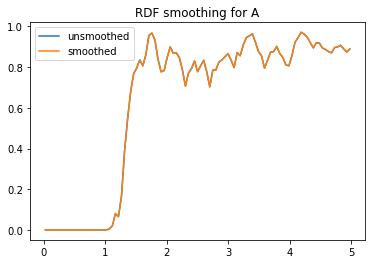

pair P-P, state A, iteration 0: 0.946752


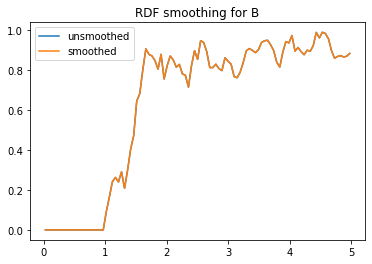

pair P-P, state B, iteration 0: 0.930641


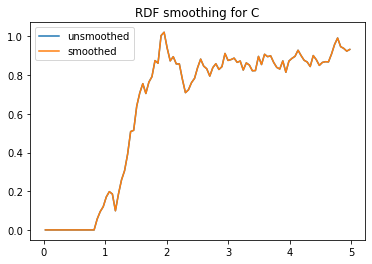

pair P-P, state C, iteration 0: 0.925124


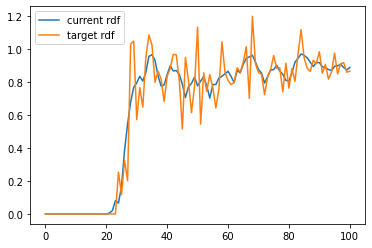

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


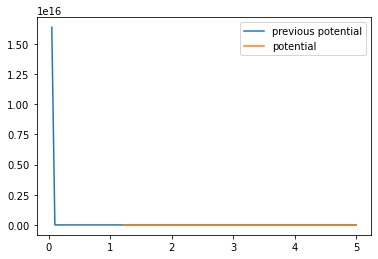

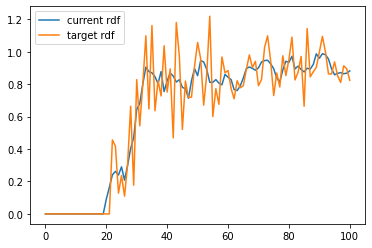

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


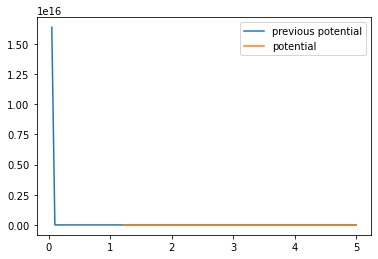

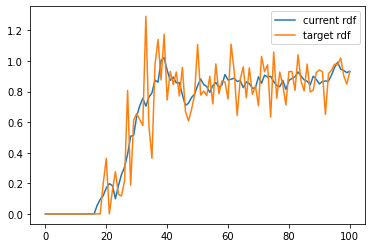

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


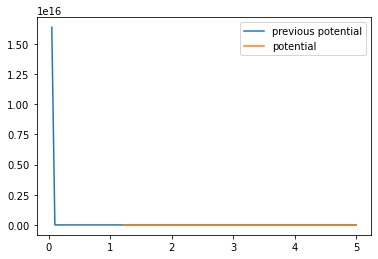

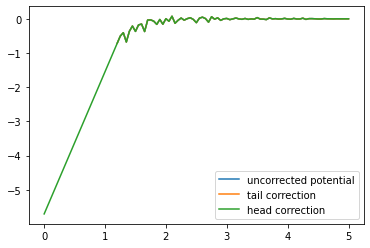

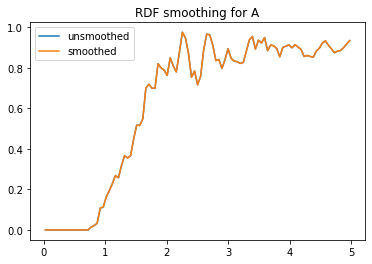

pair M-M, state A, iteration 0: 0.926897


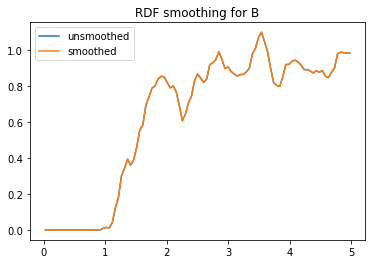

pair M-M, state B, iteration 0: 0.946207


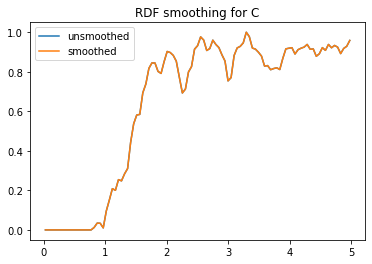

pair M-M, state C, iteration 0: 0.935746


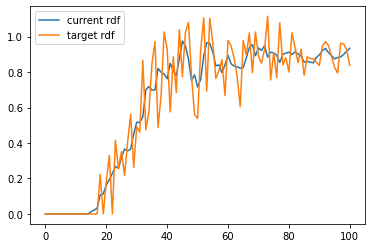

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


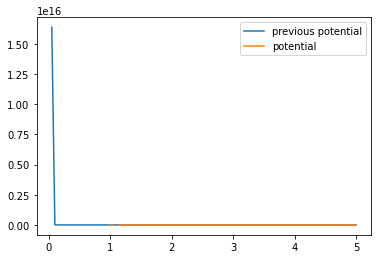

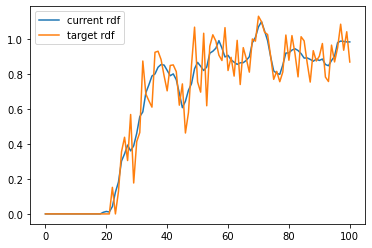

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


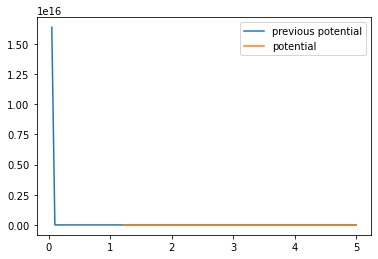

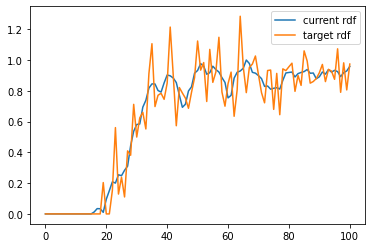

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


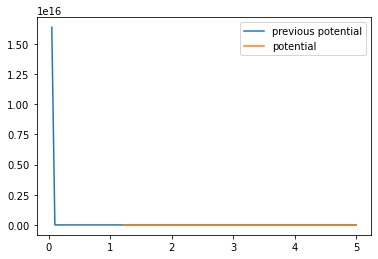

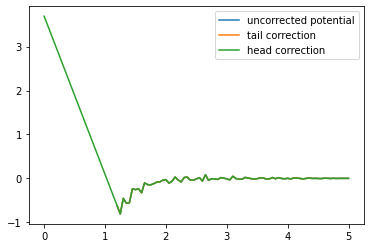

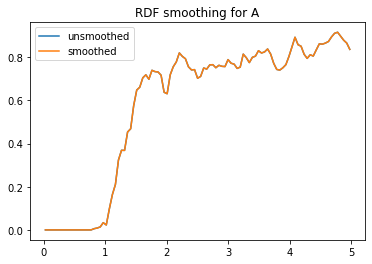

pair P-M, state A, iteration 0: 0.952924


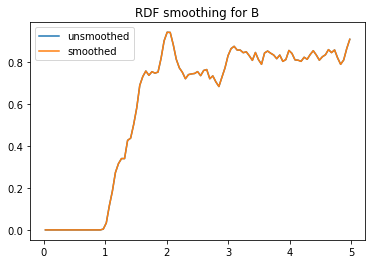

pair P-M, state B, iteration 0: 0.953402


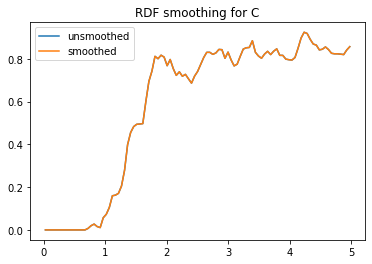

pair P-M, state C, iteration 0: 0.958322


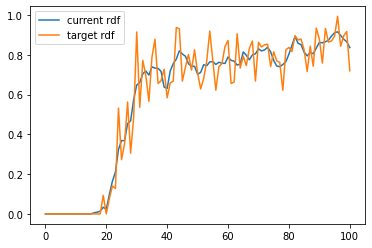

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


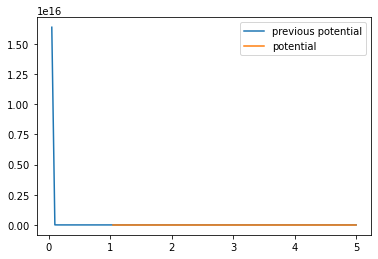

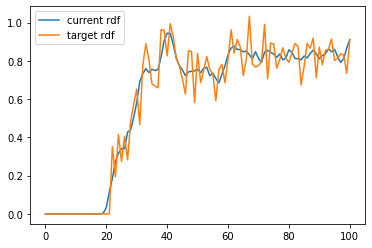

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


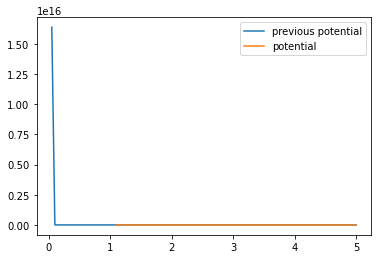

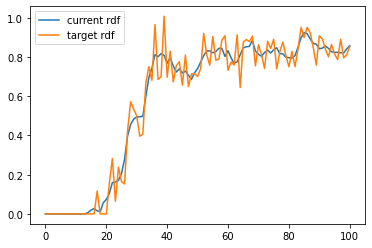

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


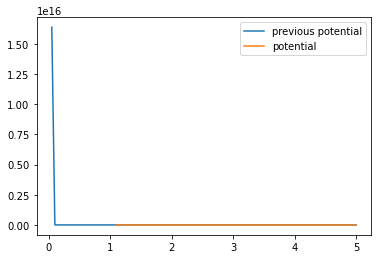

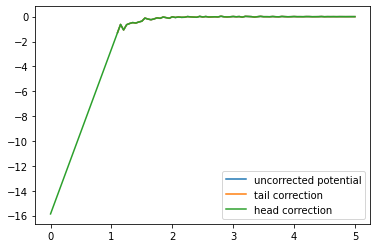

-------- Iteration 1 --------
Launching 1 GPU threads...


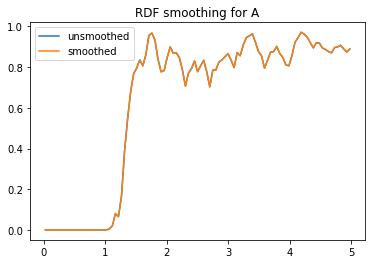

pair P-P, state A, iteration 1: 0.946752


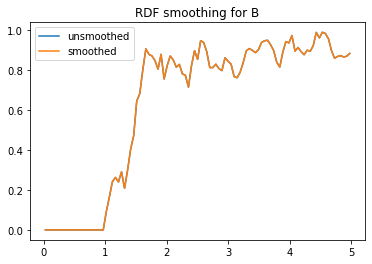

pair P-P, state B, iteration 1: 0.930641


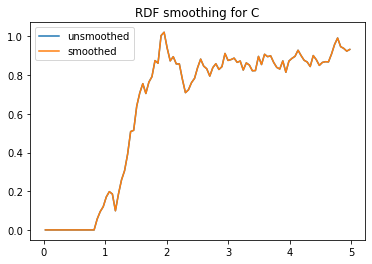

pair P-P, state C, iteration 1: 0.925124


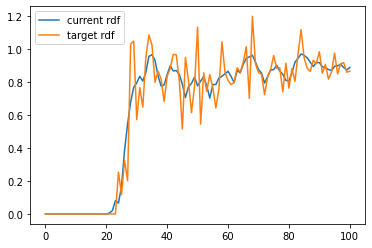

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


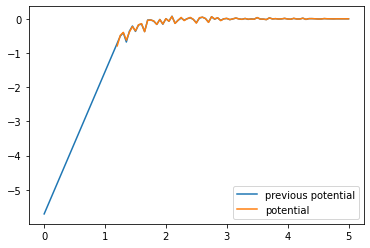

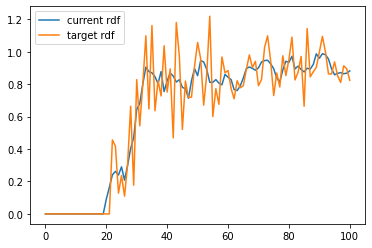

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


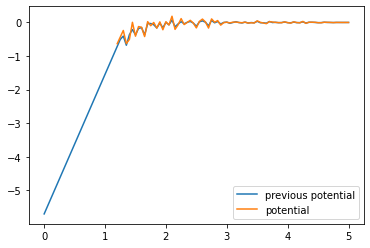

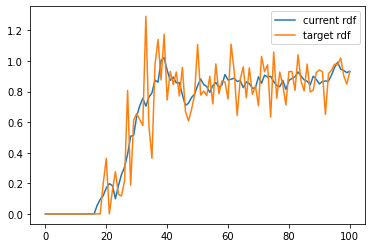

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


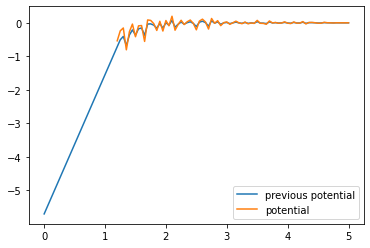

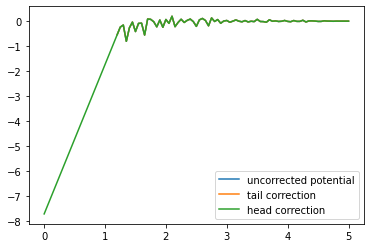

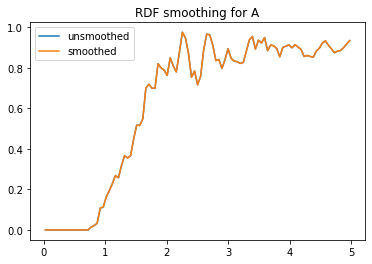

pair M-M, state A, iteration 1: 0.926897


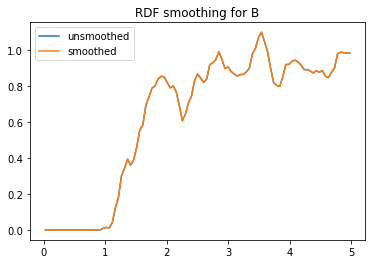

pair M-M, state B, iteration 1: 0.946207


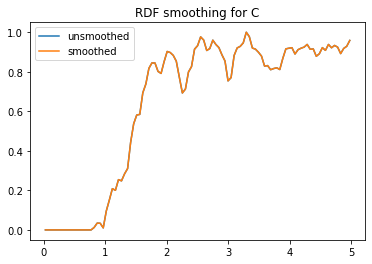

pair M-M, state C, iteration 1: 0.935746


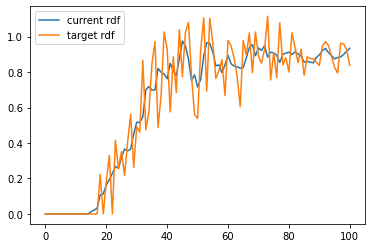

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


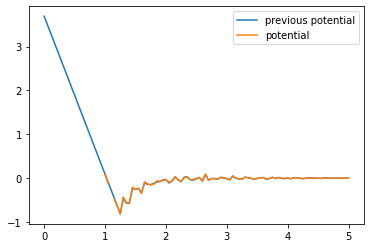

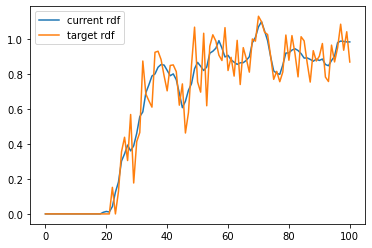

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


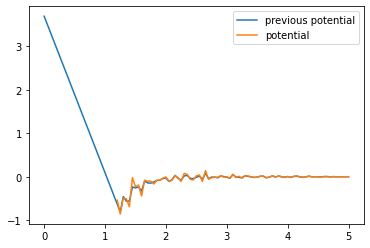

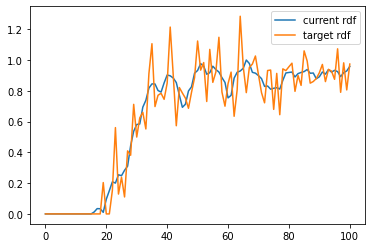

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


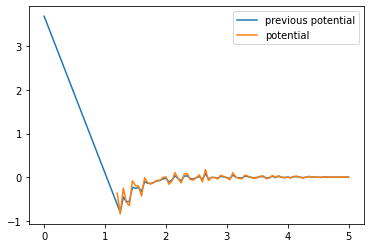

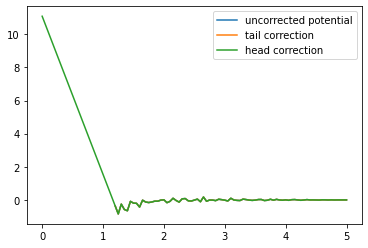

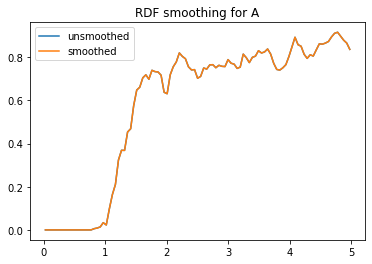

pair P-M, state A, iteration 1: 0.952924


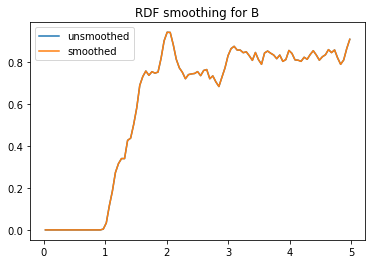

pair P-M, state B, iteration 1: 0.953402


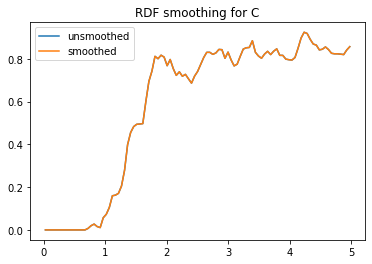

pair P-M, state C, iteration 1: 0.958322


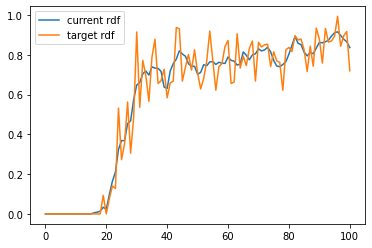

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


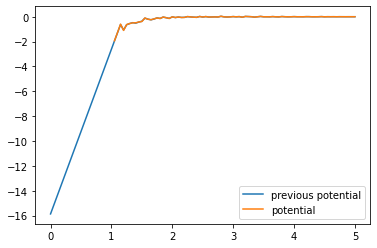

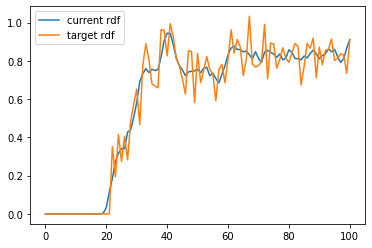

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


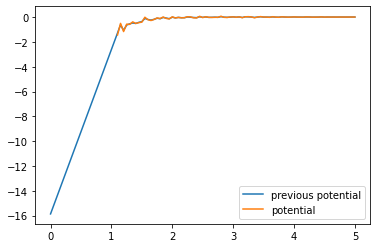

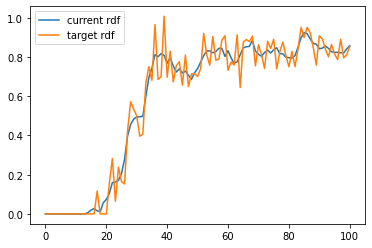

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


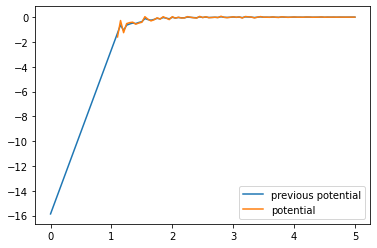

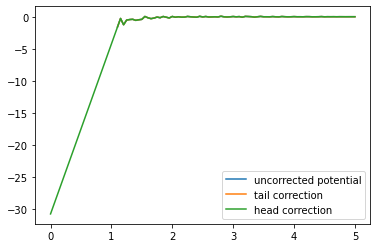

-------- Iteration 2 --------
Launching 1 GPU threads...


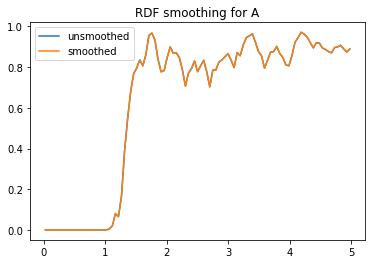

pair P-P, state A, iteration 2: 0.946752


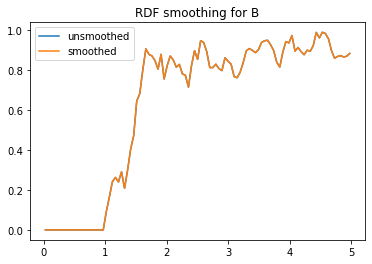

pair P-P, state B, iteration 2: 0.930641


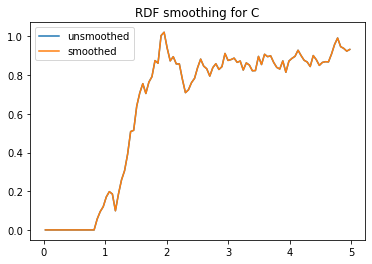

pair P-P, state C, iteration 2: 0.925124


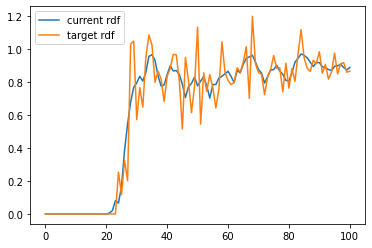

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


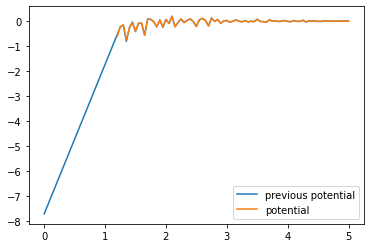

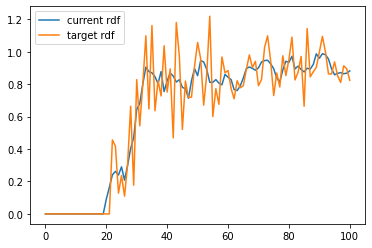

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


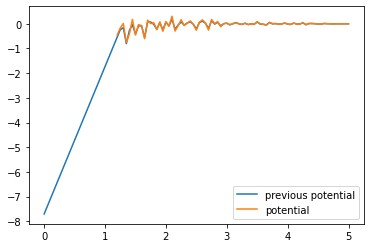

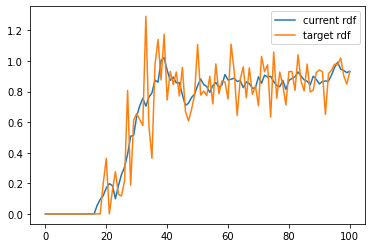

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


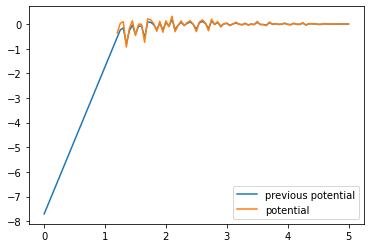

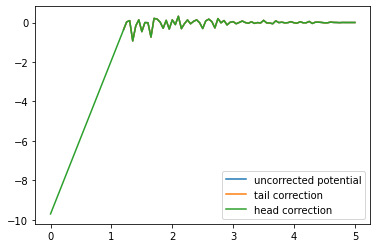

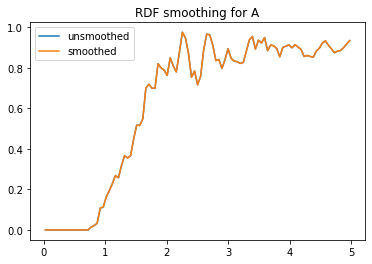

pair M-M, state A, iteration 2: 0.926897


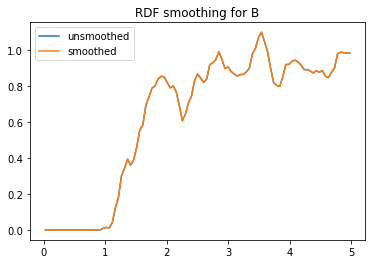

pair M-M, state B, iteration 2: 0.946207


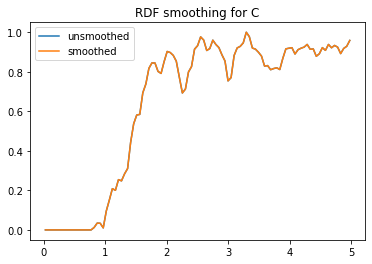

pair M-M, state C, iteration 2: 0.935746


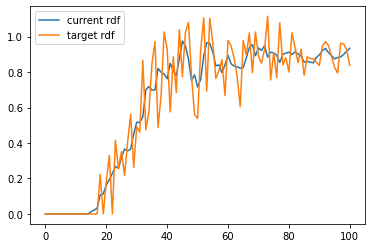

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


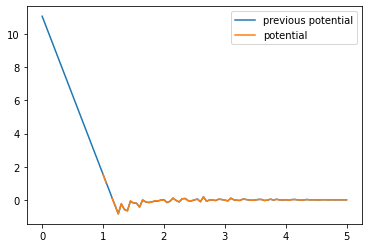

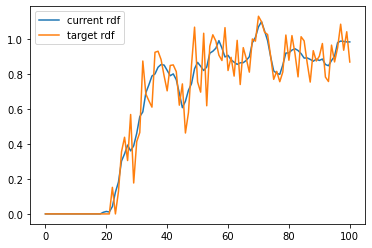

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


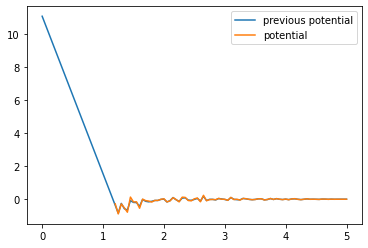

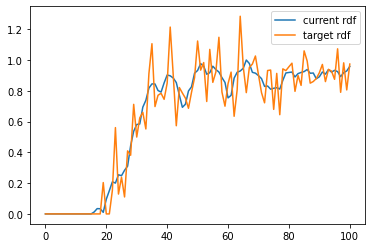

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


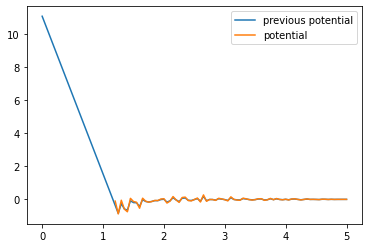

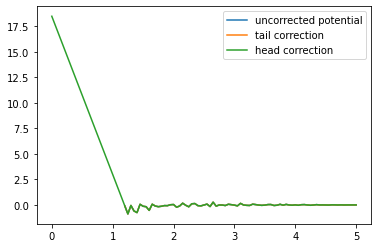

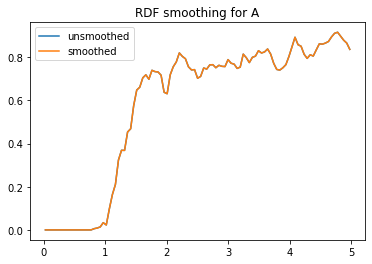

pair P-M, state A, iteration 2: 0.952924


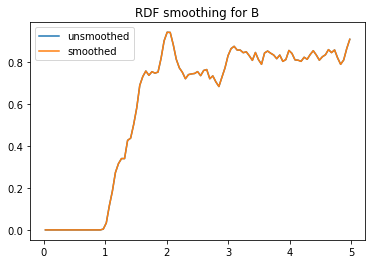

pair P-M, state B, iteration 2: 0.953402


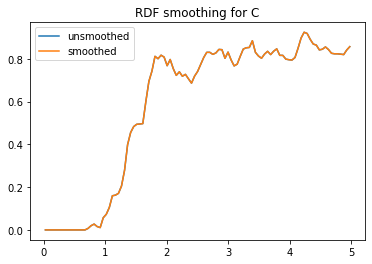

pair P-M, state C, iteration 2: 0.958322


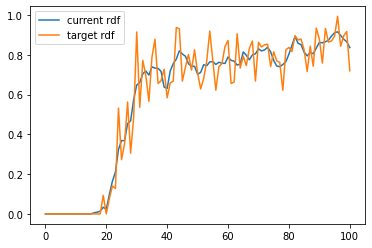

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


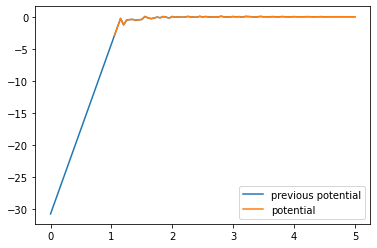

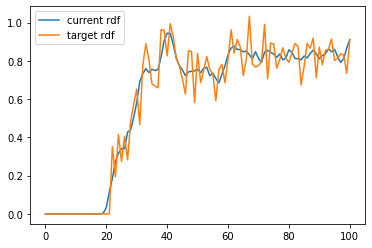

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


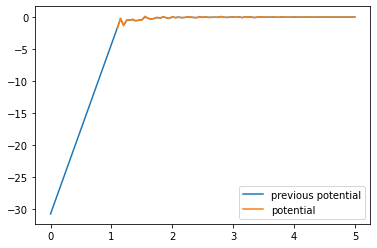

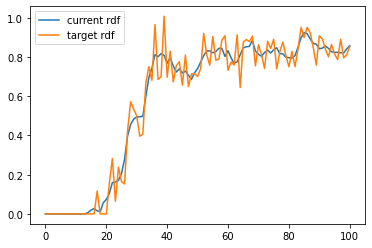

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


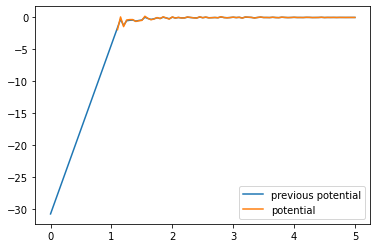

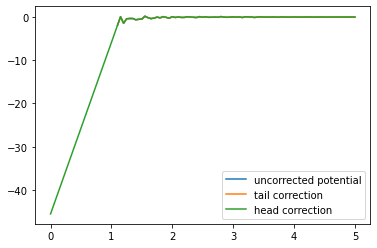

-------- Iteration 3 --------
Launching 1 GPU threads...


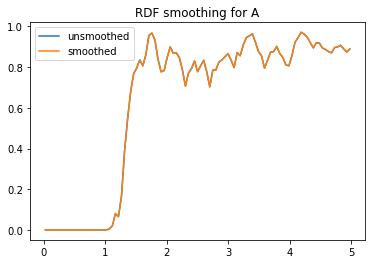

pair P-P, state A, iteration 3: 0.946752


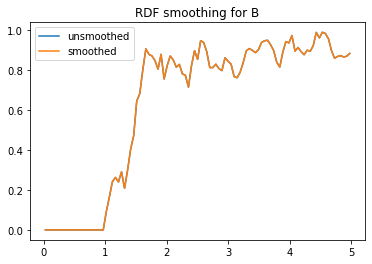

pair P-P, state B, iteration 3: 0.930641


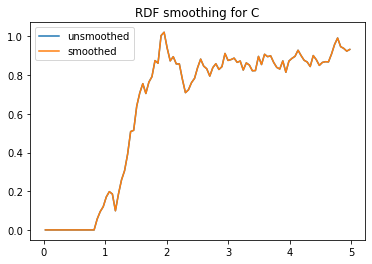

pair P-P, state C, iteration 3: 0.925124


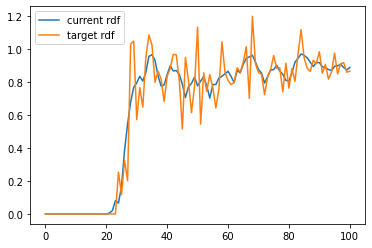

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


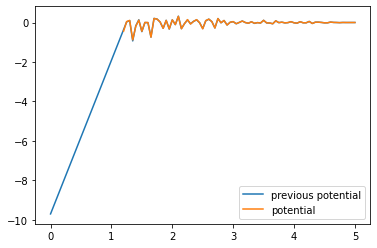

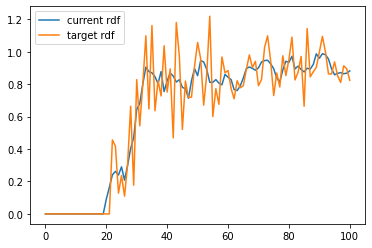

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


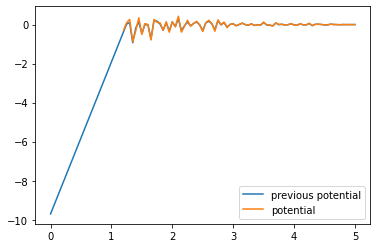

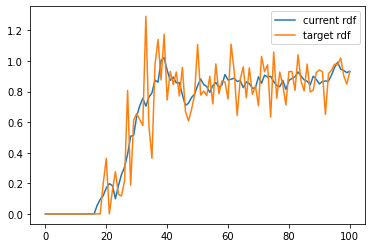

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


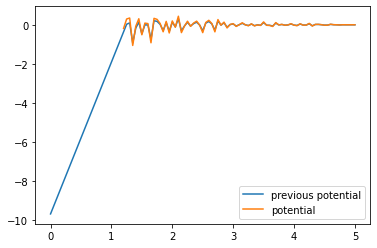

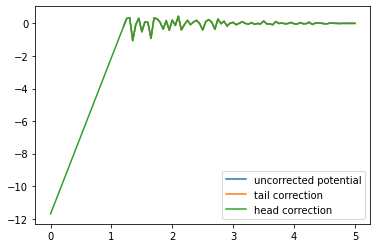

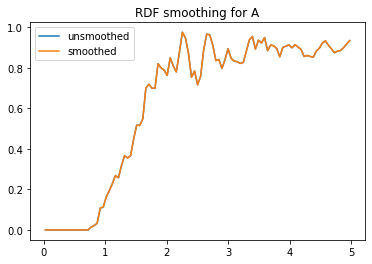

pair M-M, state A, iteration 3: 0.926897


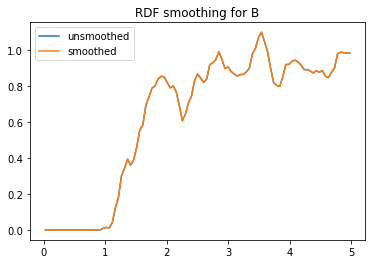

pair M-M, state B, iteration 3: 0.946207


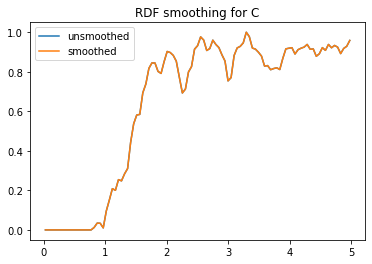

pair M-M, state C, iteration 3: 0.935746


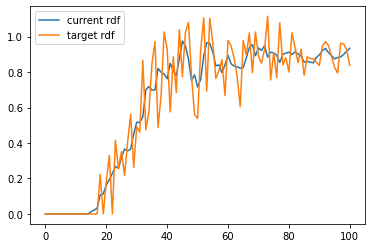

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


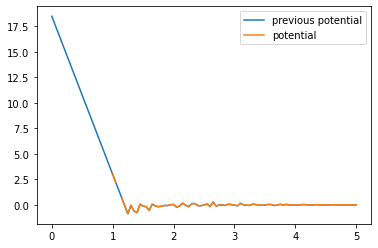

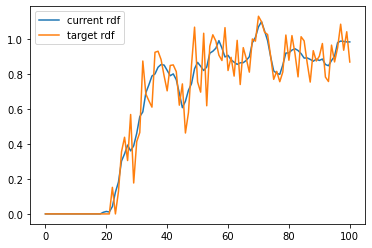

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


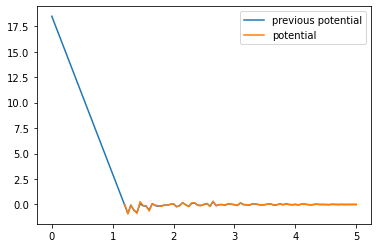

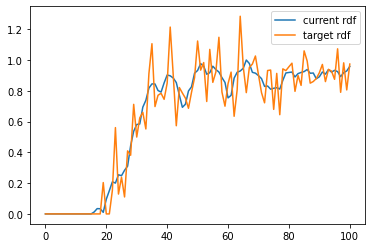

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


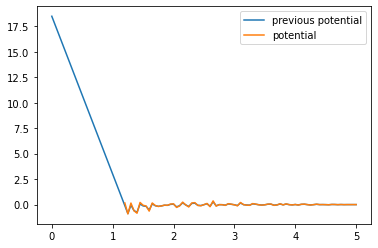

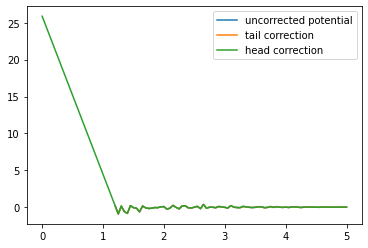

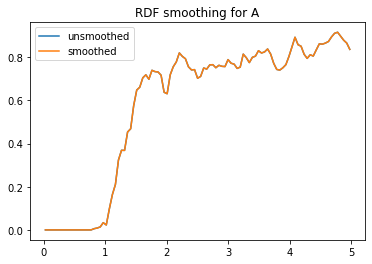

pair P-M, state A, iteration 3: 0.952924


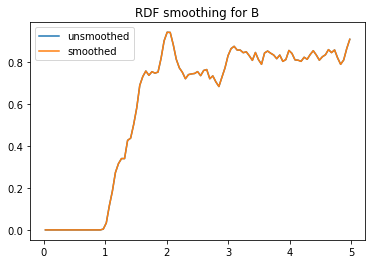

pair P-M, state B, iteration 3: 0.953402


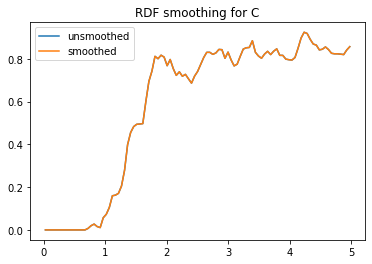

pair P-M, state C, iteration 3: 0.958322


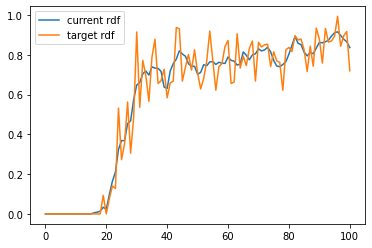

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


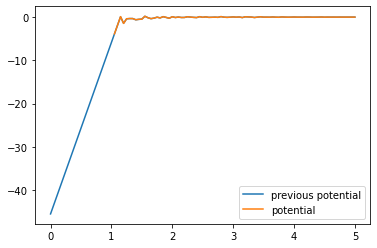

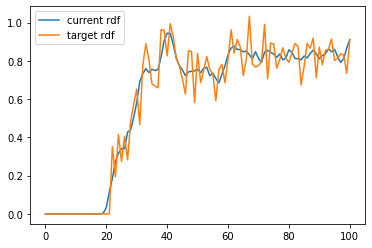

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


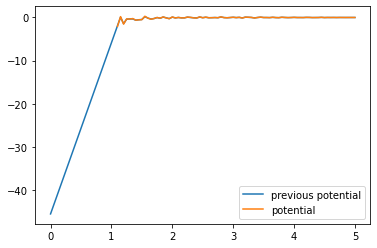

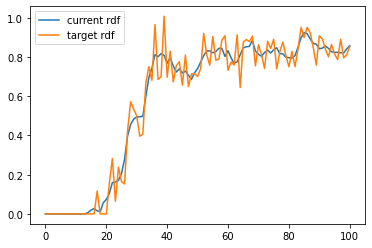

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


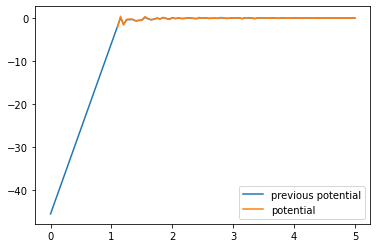

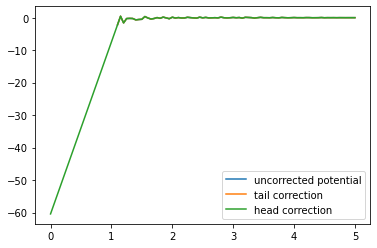

-------- Iteration 4 --------
Launching 1 GPU threads...


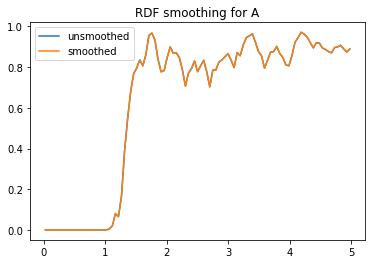

pair P-P, state A, iteration 4: 0.946752


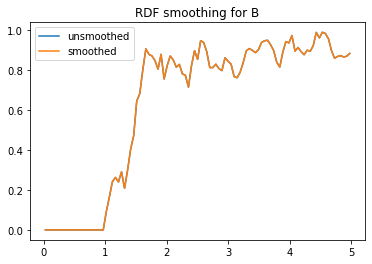

pair P-P, state B, iteration 4: 0.930641


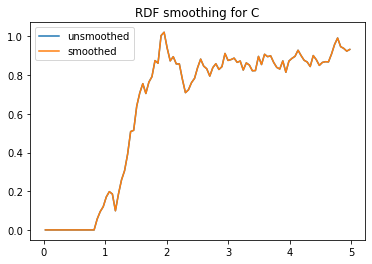

pair P-P, state C, iteration 4: 0.925124


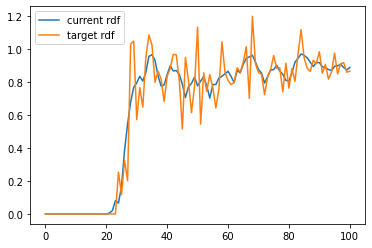

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


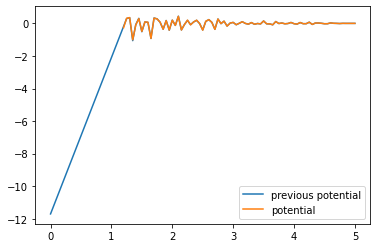

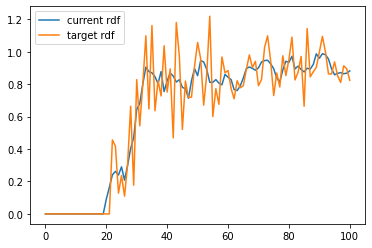

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


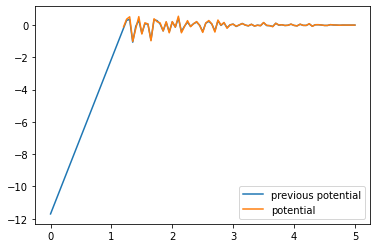

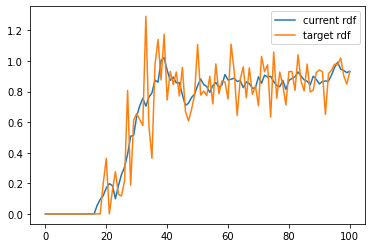

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


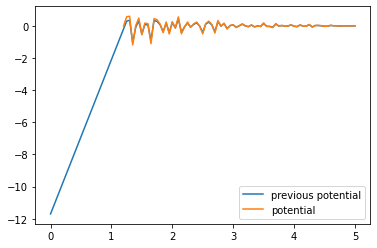

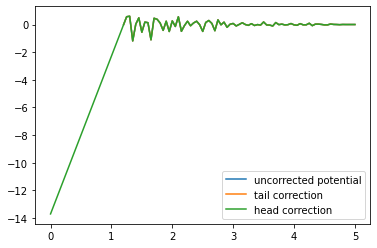

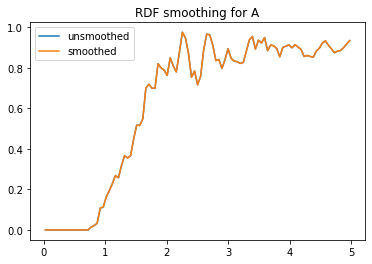

pair M-M, state A, iteration 4: 0.926897


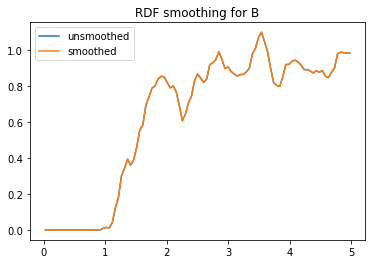

pair M-M, state B, iteration 4: 0.946207


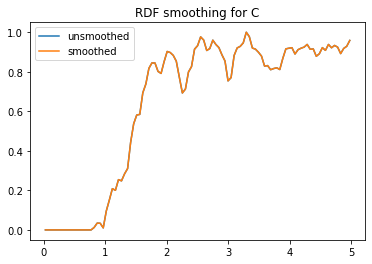

pair M-M, state C, iteration 4: 0.935746


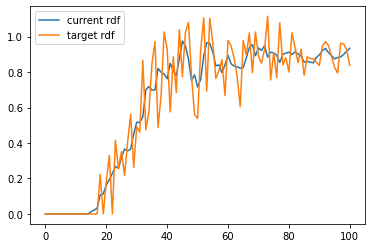

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


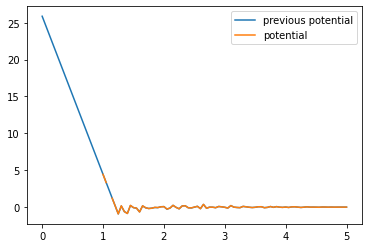

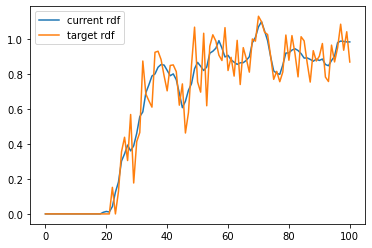

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


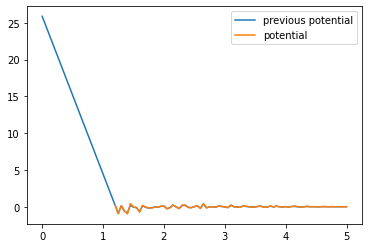

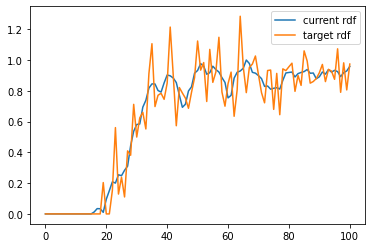

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


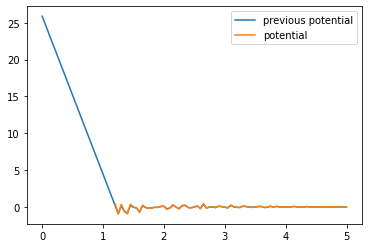

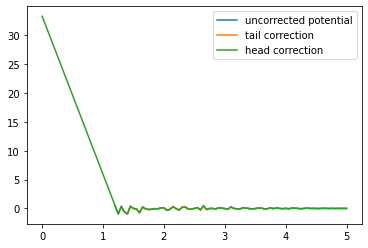

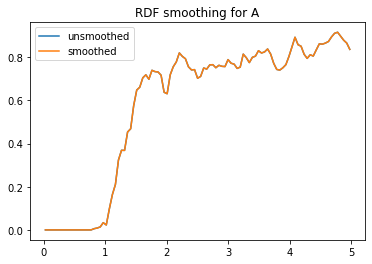

pair P-M, state A, iteration 4: 0.952924


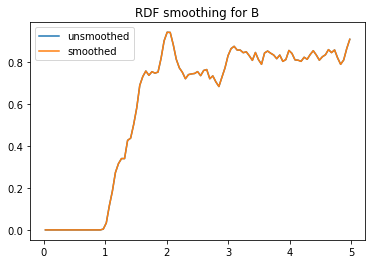

pair P-M, state B, iteration 4: 0.953402


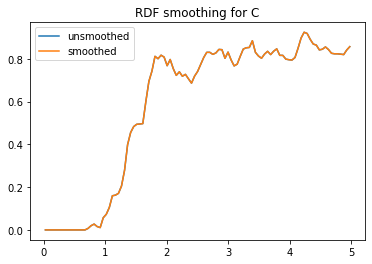

pair P-M, state C, iteration 4: 0.958322


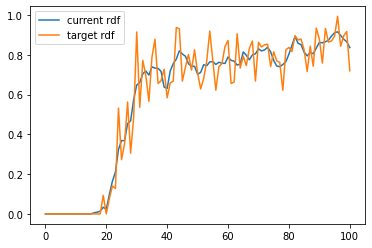

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


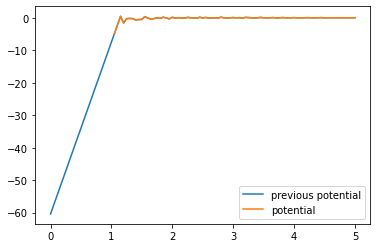

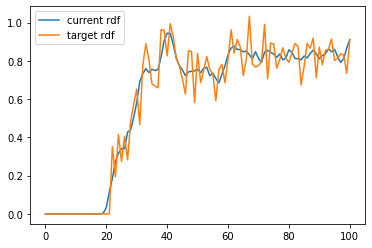

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


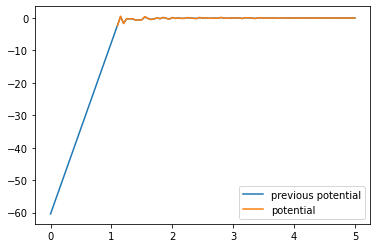

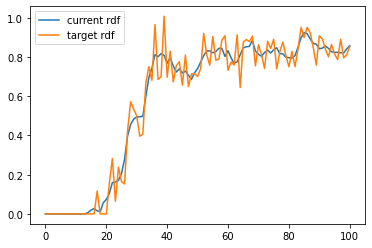

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


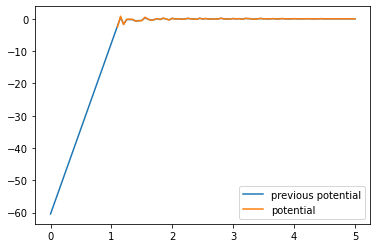

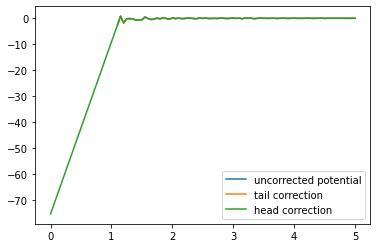

-------- Iteration 5 --------
Launching 1 GPU threads...


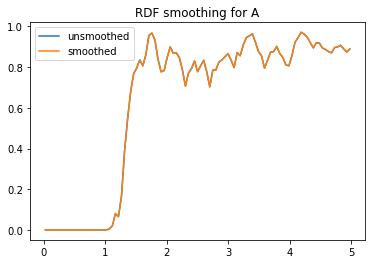

pair P-P, state A, iteration 5: 0.946752


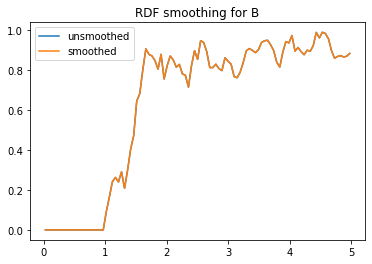

pair P-P, state B, iteration 5: 0.930641


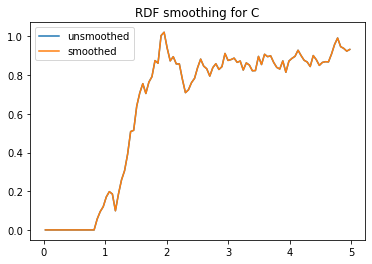

pair P-P, state C, iteration 5: 0.925124


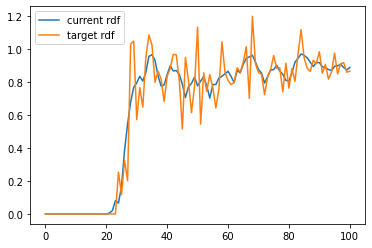

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


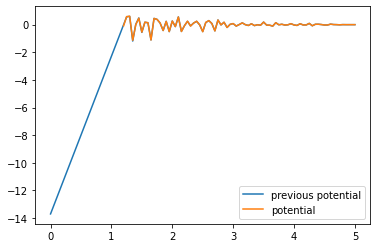

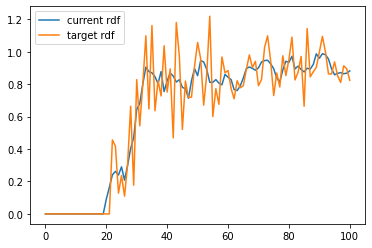

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


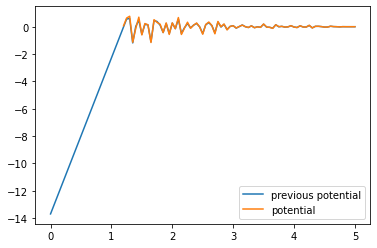

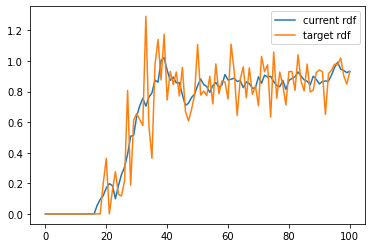

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


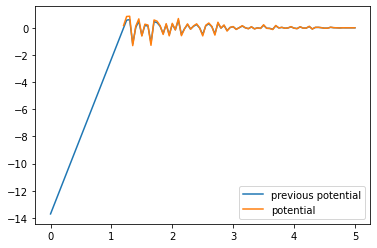

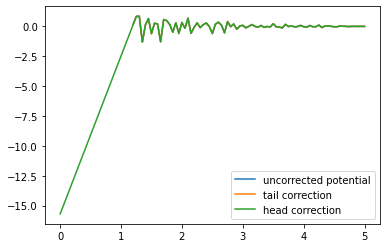

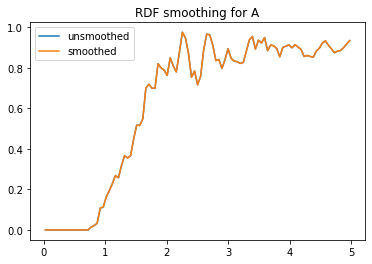

pair M-M, state A, iteration 5: 0.926897


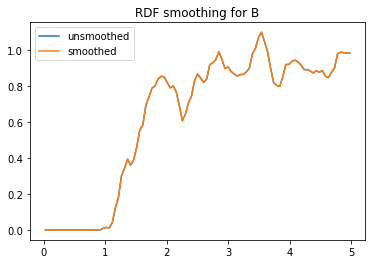

pair M-M, state B, iteration 5: 0.946207


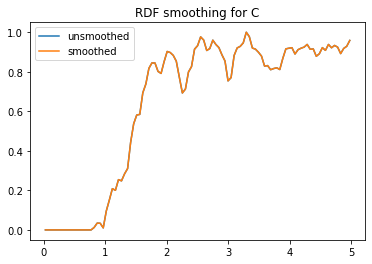

pair M-M, state C, iteration 5: 0.935746


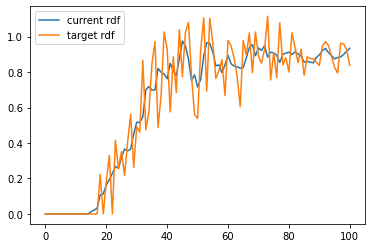

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


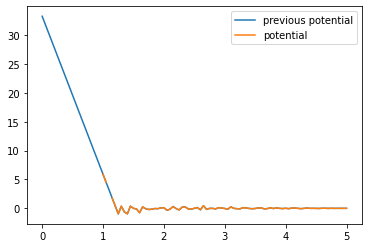

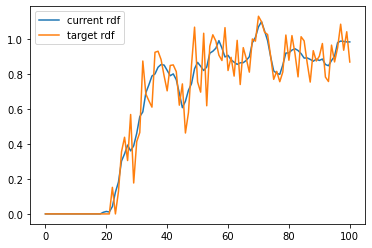

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


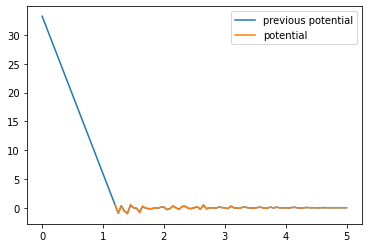

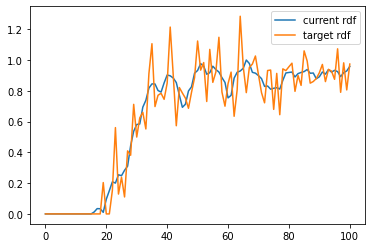

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


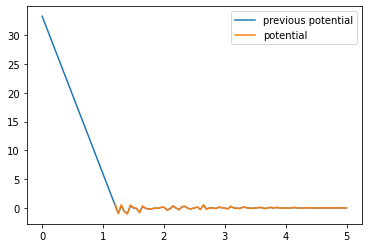

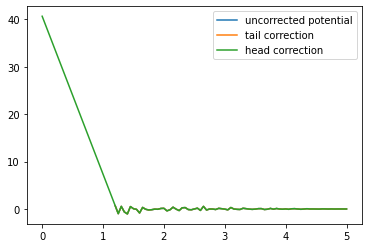

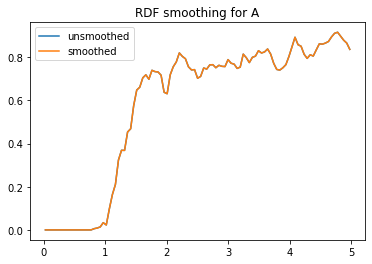

pair P-M, state A, iteration 5: 0.952924


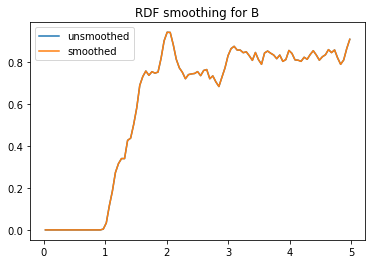

pair P-M, state B, iteration 5: 0.953402


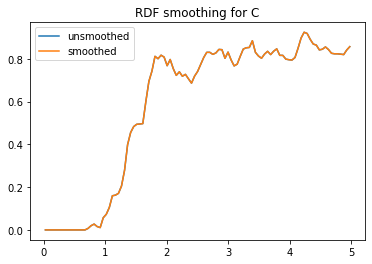

pair P-M, state C, iteration 5: 0.958322


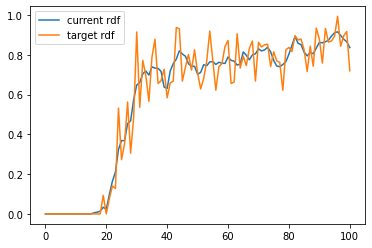

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


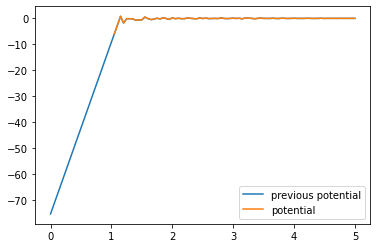

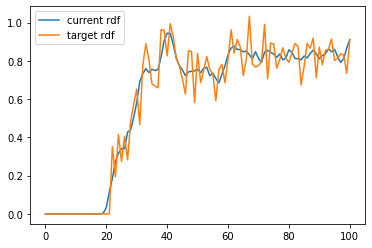

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


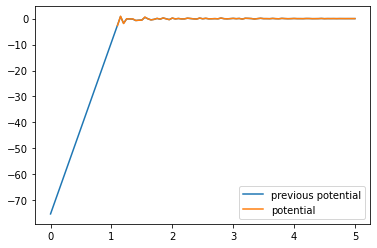

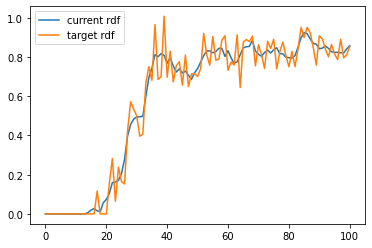

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


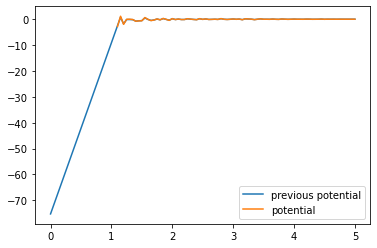

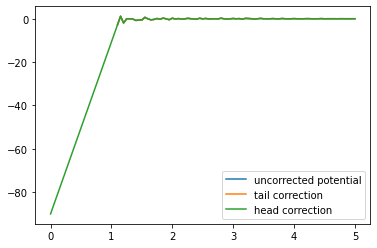

-------- Iteration 6 --------
Launching 1 GPU threads...


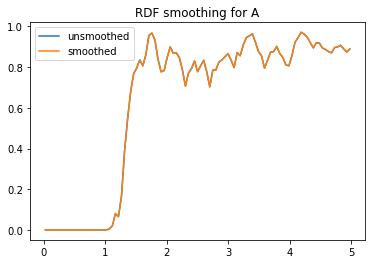

pair P-P, state A, iteration 6: 0.946752


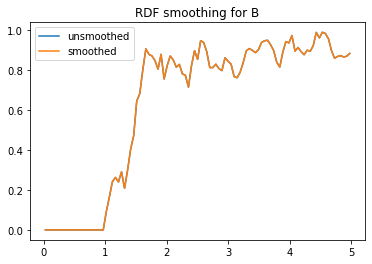

pair P-P, state B, iteration 6: 0.930641


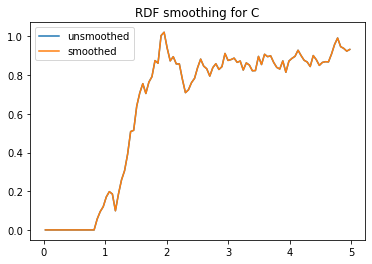

pair P-P, state C, iteration 6: 0.925124


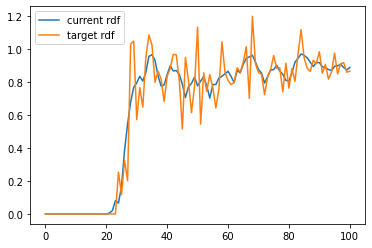

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


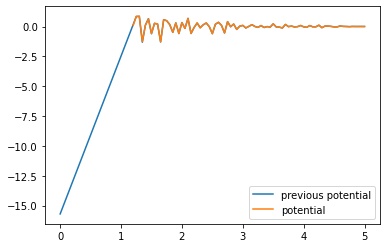

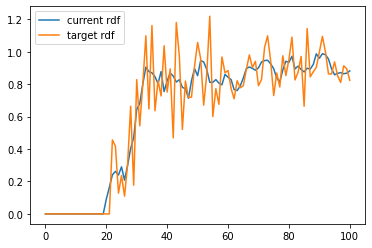

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


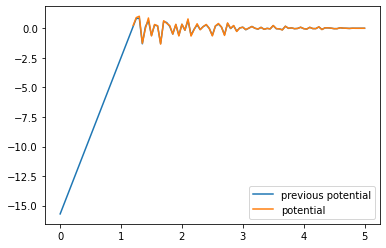

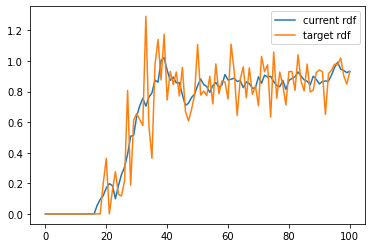

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


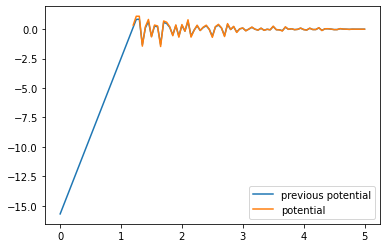

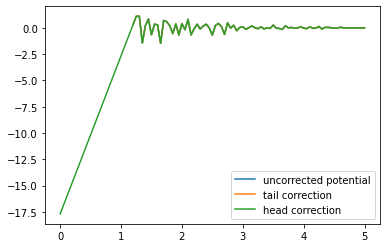

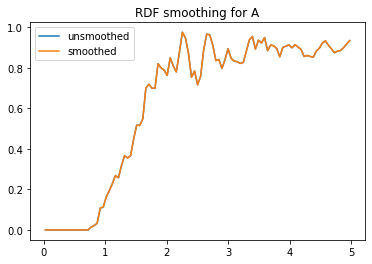

pair M-M, state A, iteration 6: 0.926897


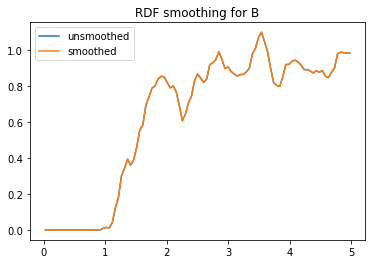

pair M-M, state B, iteration 6: 0.946207


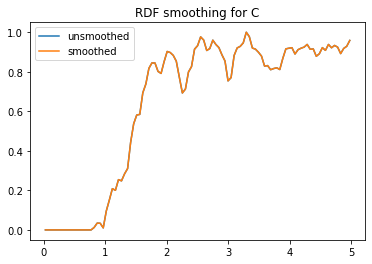

pair M-M, state C, iteration 6: 0.935746


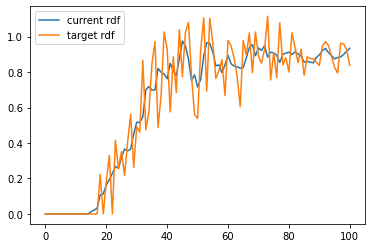

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


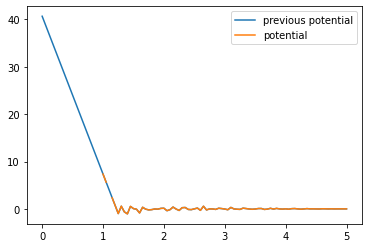

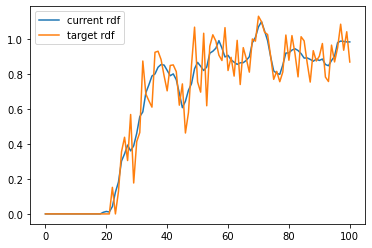

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


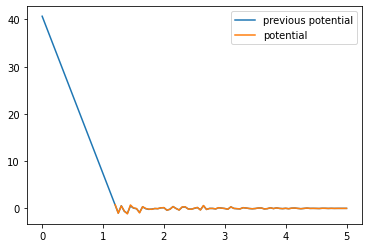

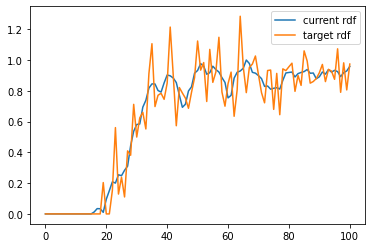

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


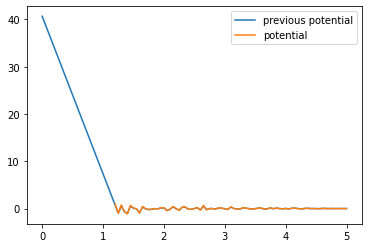

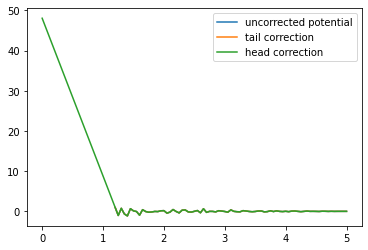

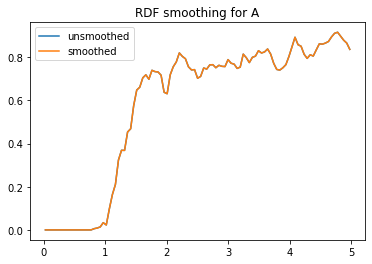

pair P-M, state A, iteration 6: 0.952924


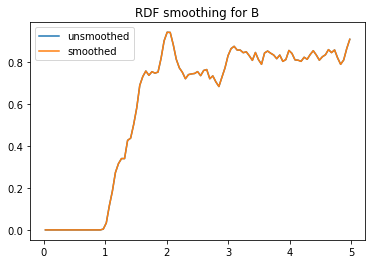

pair P-M, state B, iteration 6: 0.953402


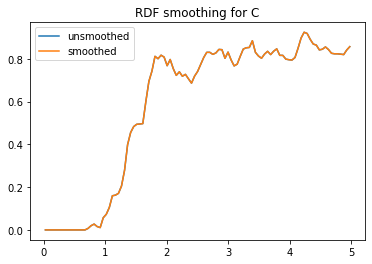

pair P-M, state C, iteration 6: 0.958322


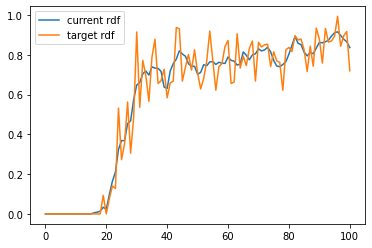

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


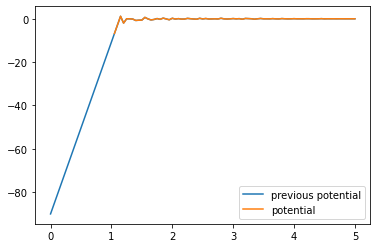

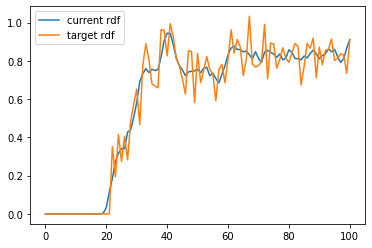

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


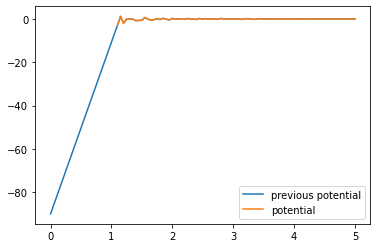

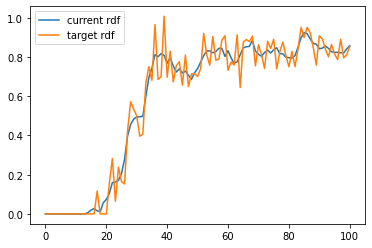

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


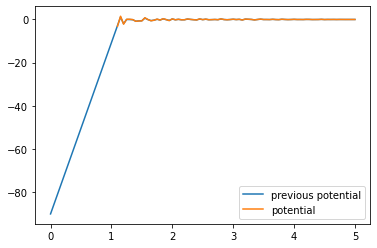

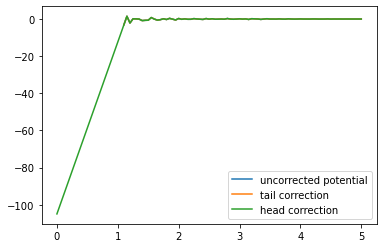

-------- Iteration 7 --------
Launching 1 GPU threads...


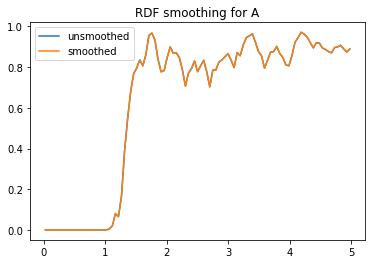

pair P-P, state A, iteration 7: 0.946752


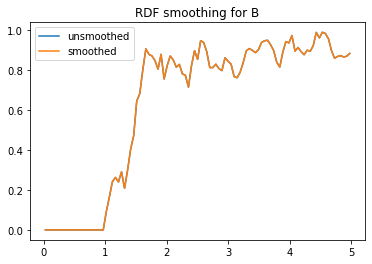

pair P-P, state B, iteration 7: 0.930641


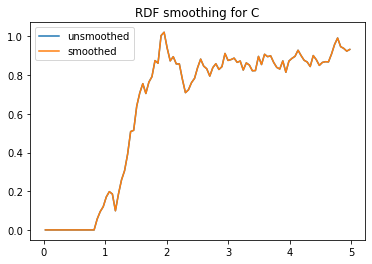

pair P-P, state C, iteration 7: 0.925124


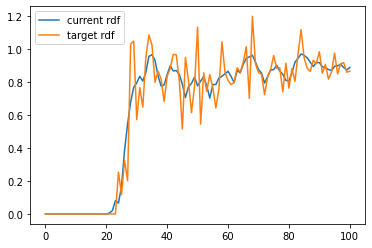

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


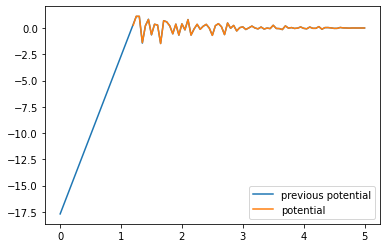

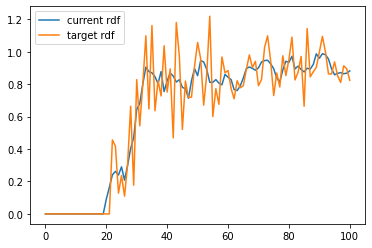

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


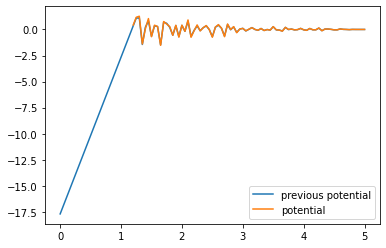

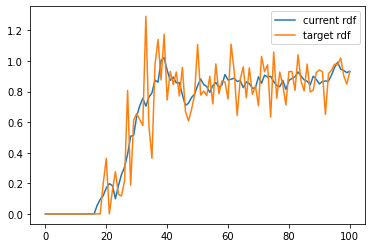

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


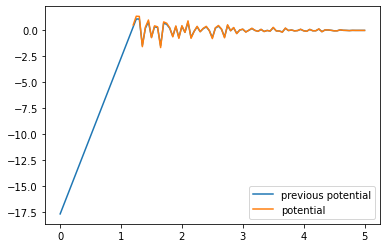

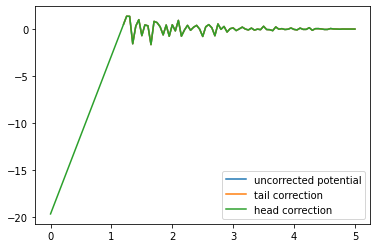

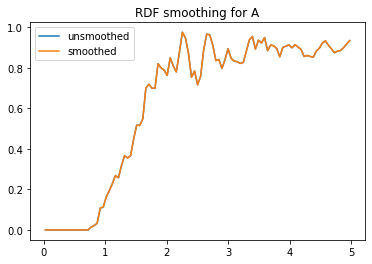

pair M-M, state A, iteration 7: 0.926897


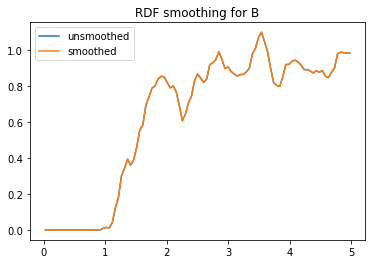

pair M-M, state B, iteration 7: 0.946207


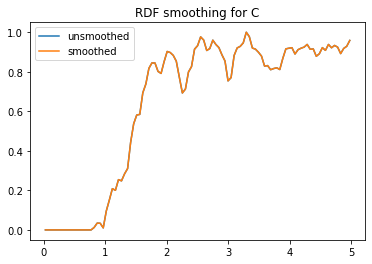

pair M-M, state C, iteration 7: 0.935746


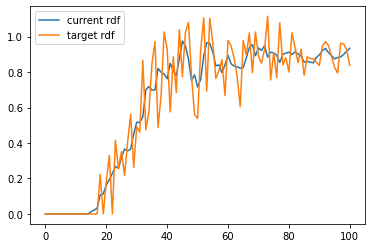

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


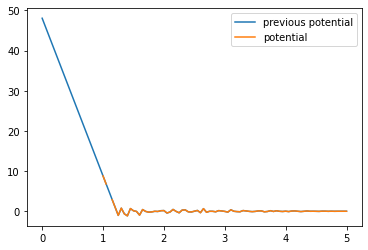

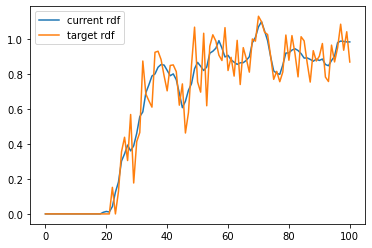

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


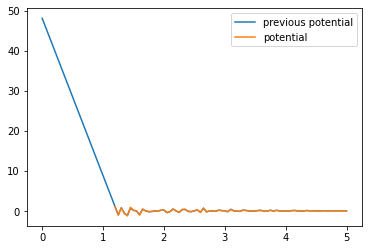

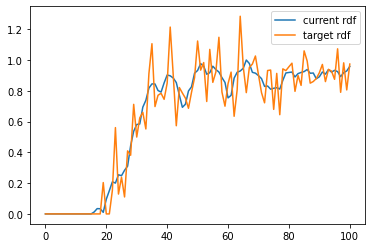

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


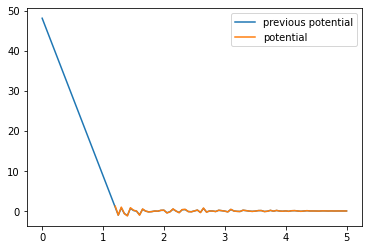

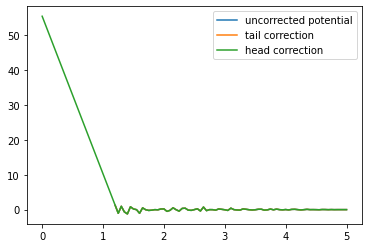

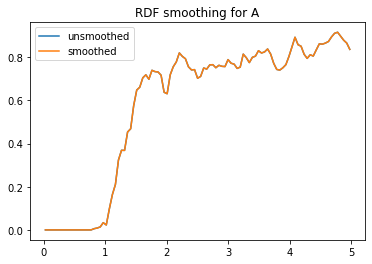

pair P-M, state A, iteration 7: 0.952924


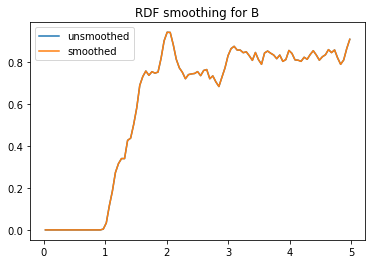

pair P-M, state B, iteration 7: 0.953402


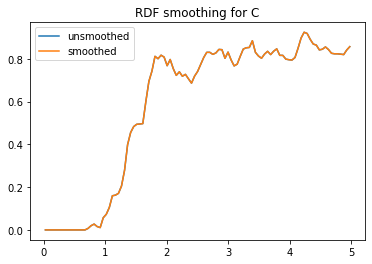

pair P-M, state C, iteration 7: 0.958322


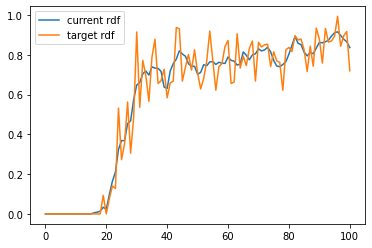

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


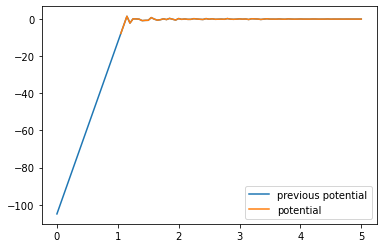

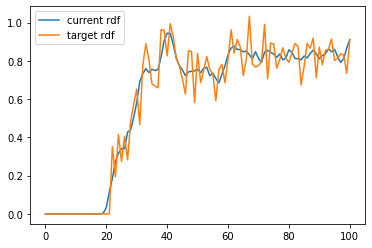

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


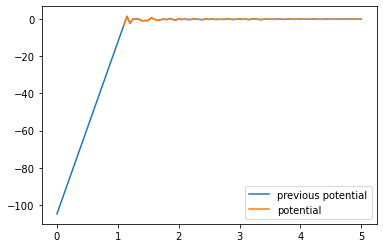

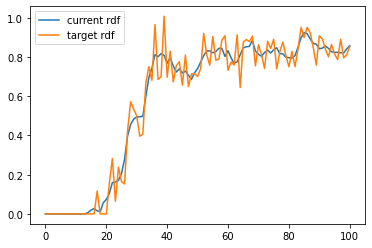

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


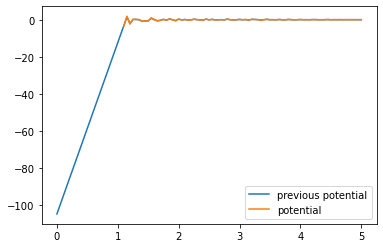

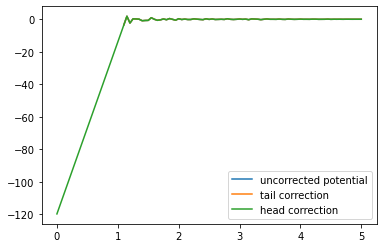

-------- Iteration 8 --------
Launching 1 GPU threads...


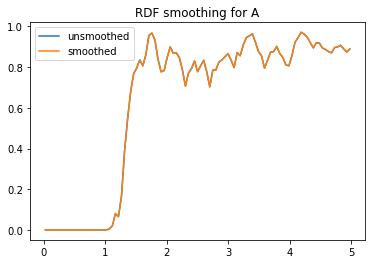

pair P-P, state A, iteration 8: 0.946752


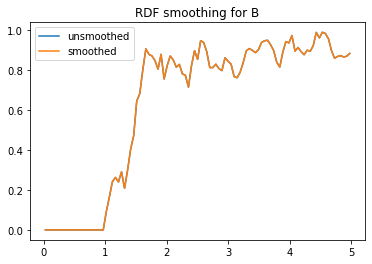

pair P-P, state B, iteration 8: 0.930641


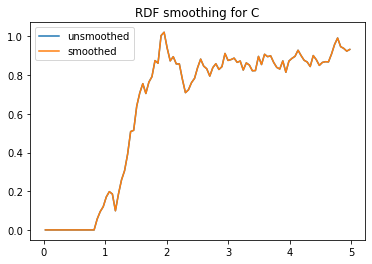

pair P-P, state C, iteration 8: 0.925124


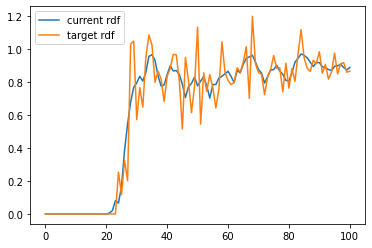

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


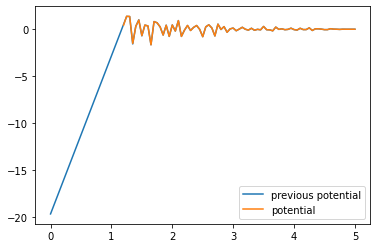

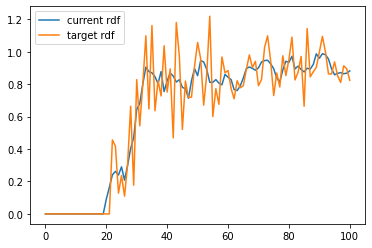

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


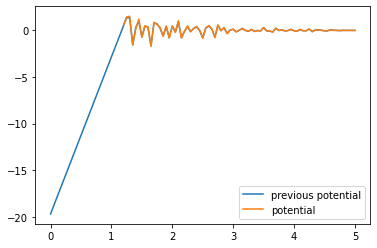

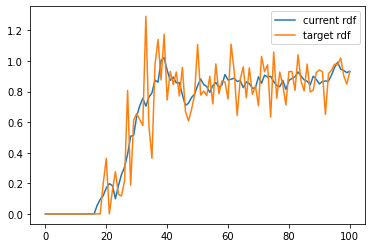

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


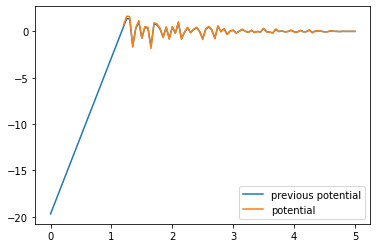

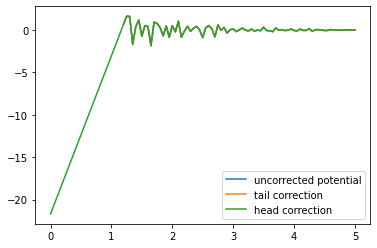

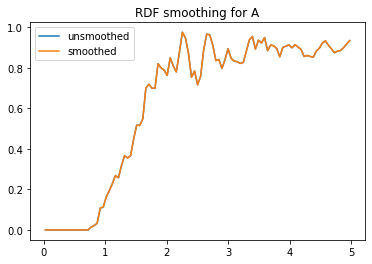

pair M-M, state A, iteration 8: 0.926897


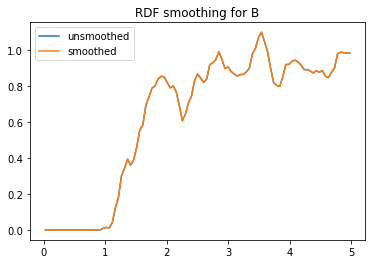

pair M-M, state B, iteration 8: 0.946207


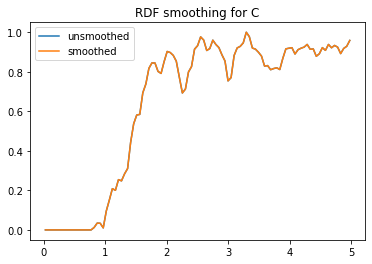

pair M-M, state C, iteration 8: 0.935746


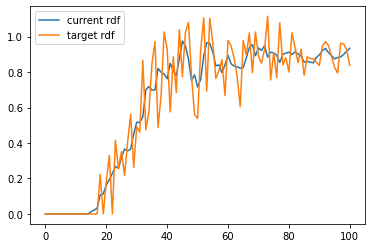

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


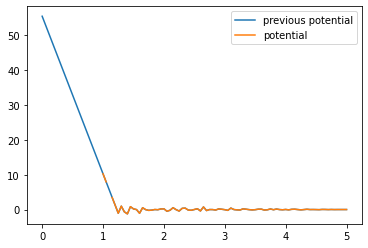

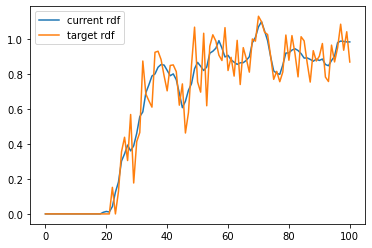

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


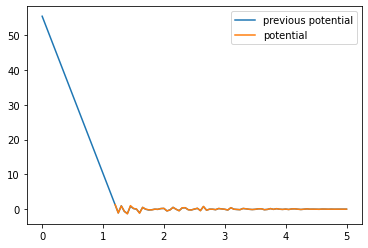

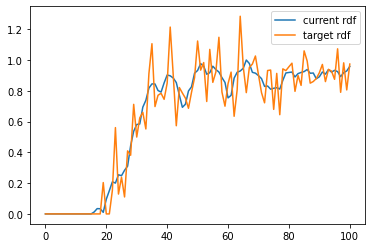

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


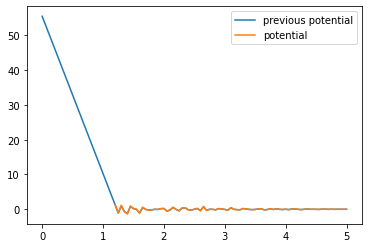

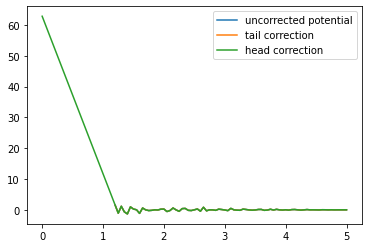

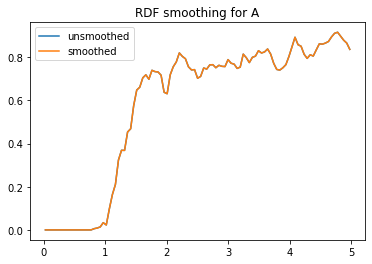

pair P-M, state A, iteration 8: 0.952924


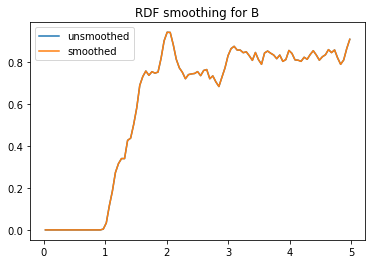

pair P-M, state B, iteration 8: 0.953402


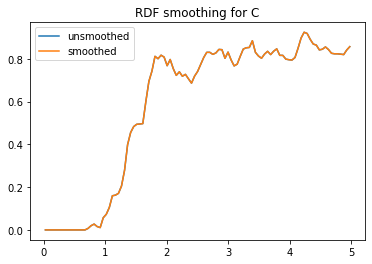

pair P-M, state C, iteration 8: 0.958322


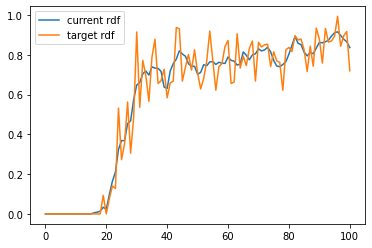

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


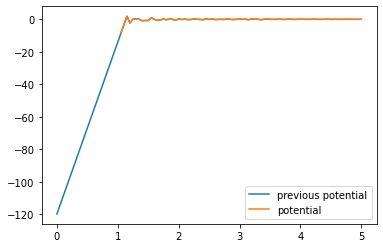

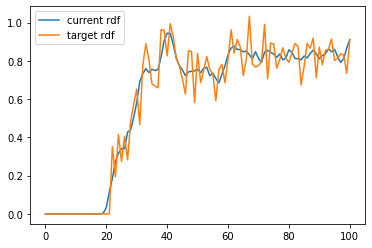

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


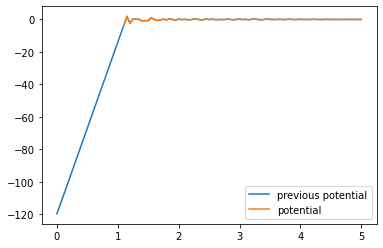

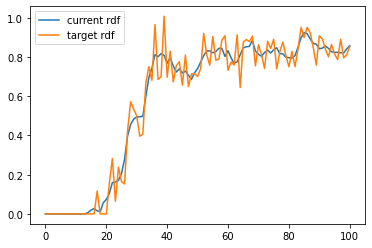

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


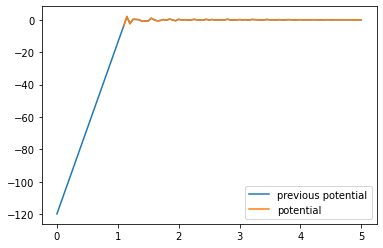

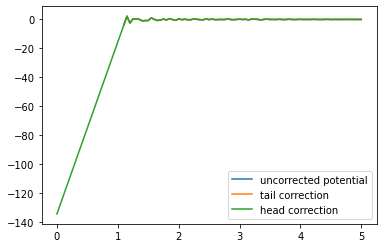

-------- Iteration 9 --------
Launching 1 GPU threads...


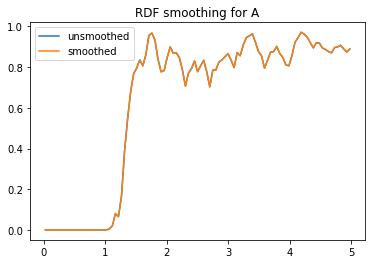

pair P-P, state A, iteration 9: 0.946752


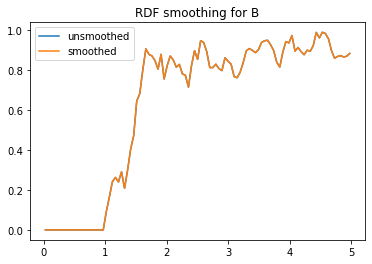

pair P-P, state B, iteration 9: 0.930641


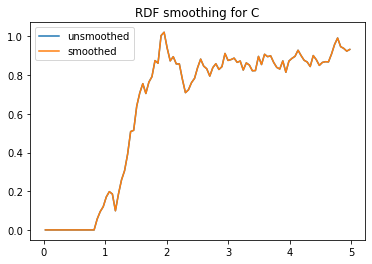

pair P-P, state C, iteration 9: 0.925124


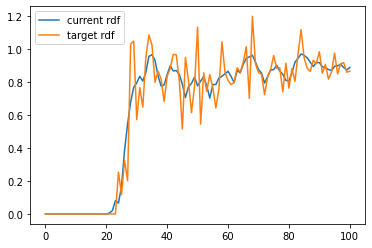

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


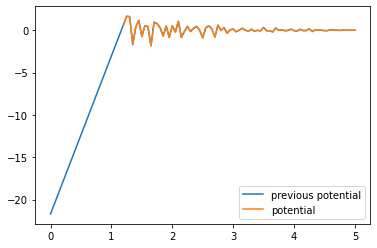

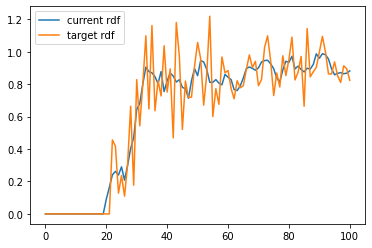

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


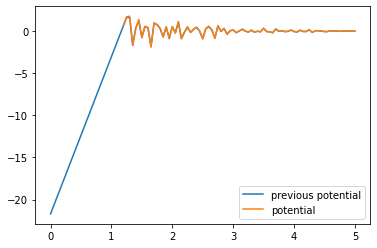

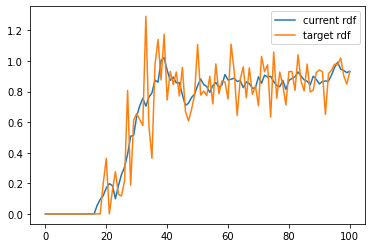

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


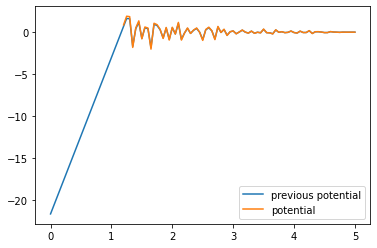

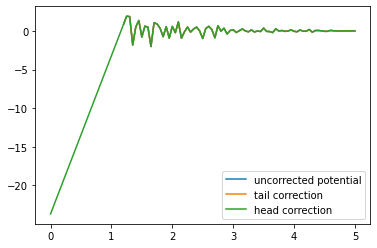

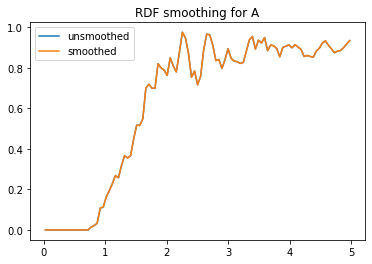

pair M-M, state A, iteration 9: 0.926897


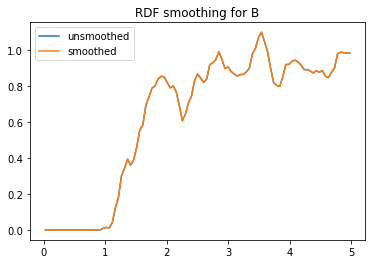

pair M-M, state B, iteration 9: 0.946207


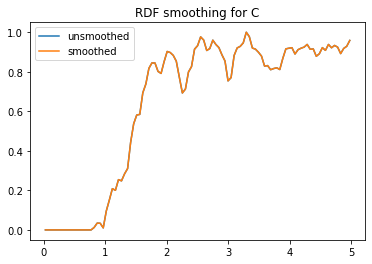

pair M-M, state C, iteration 9: 0.935746


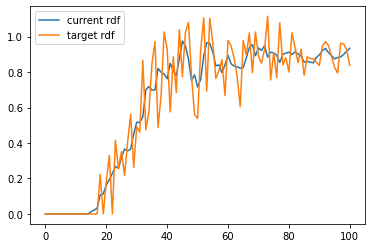

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


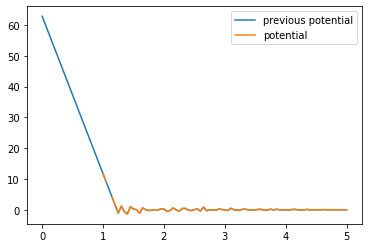

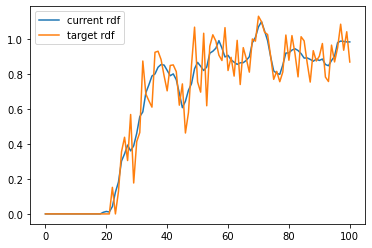

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


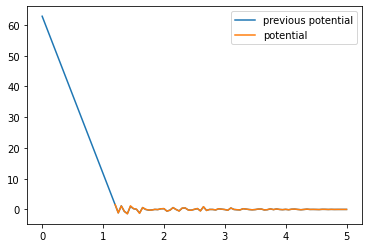

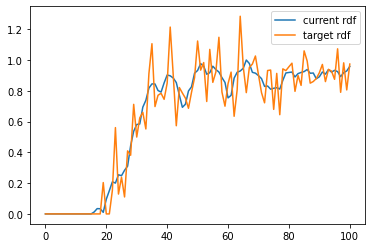

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


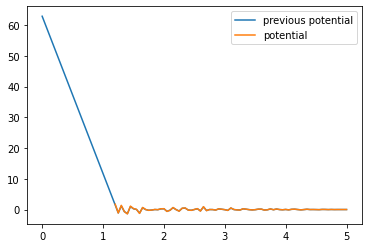

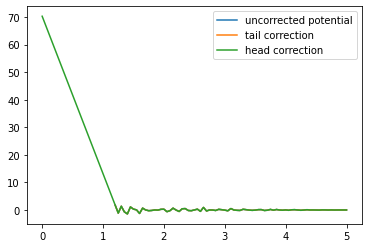

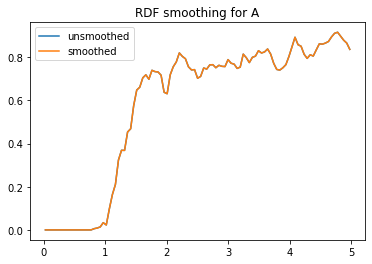

pair P-M, state A, iteration 9: 0.952924


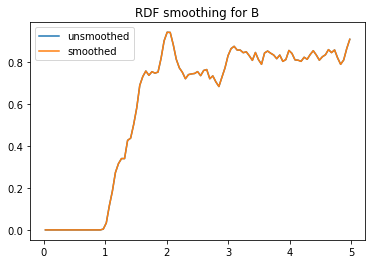

pair P-M, state B, iteration 9: 0.953402


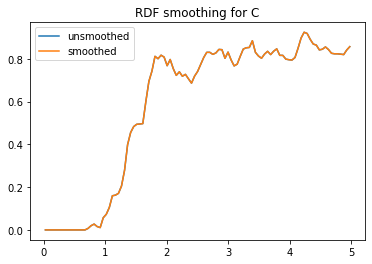

pair P-M, state C, iteration 9: 0.958322


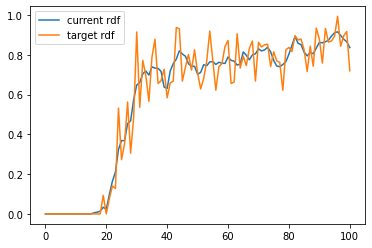

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


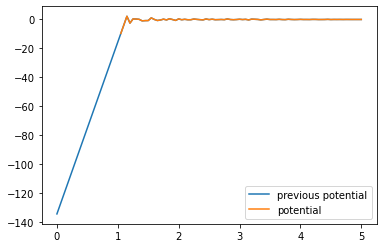

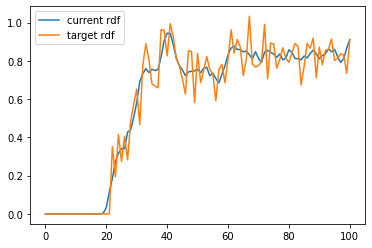

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


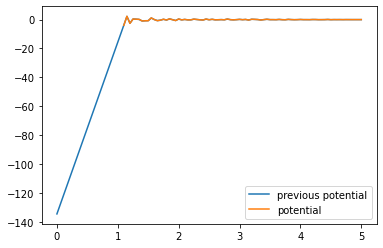

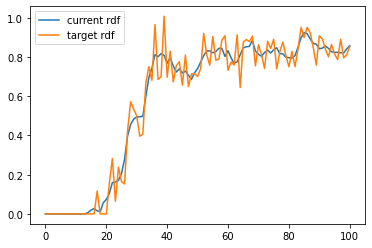

/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:164: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


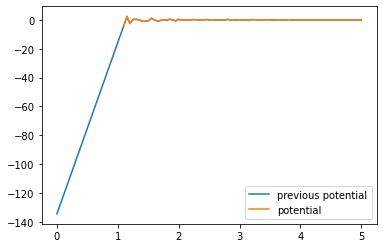

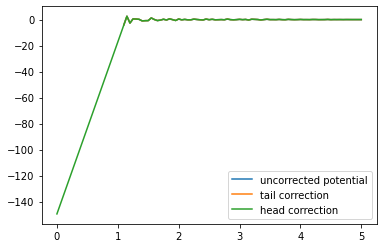

In [10]:
opt.optimize(n_iterations=10, engine='hoomd')